# Importando Bibliotecas

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import skopt
from prophet import Prophet
from sklearn import metrics
from sklearn.model_selection import ParameterGrid

# Lendo os Dados

In [2]:
df = pd.read_csv('dados_tcc.csv', sep=';')
df['ds'] = df['ds'].str.replace('/', '-')
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')

In [33]:
df

,ds,y
0,2015-01-31,642
1,2015-02-28,590
2,2015-03-31,849
3,2015-04-30,1271
4,2015-05-31,1585
...,...,...
74,2021-03-31,26373
75,2021-04-30,28130
76,2021-05-31,29576
77,2021-06-30,30588


# Prophet Simples

In [4]:
model = Prophet()

In [5]:
model.fit(df)

12:08:42 - cmdstanpy - INFO - Chain [1] start processing
12:08:44 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
forecast = model.predict(df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-31,1122.224444,-1546.842064,1683.382361,1122.224444,1122.224444,-1104.454633,-1104.454633,-1104.454633,-1104.454633,-1104.454633,-1104.454633,0.0,0.0,0.0,17.769810
1,2015-02-28,1243.592149,-2599.697822,641.984267,1243.592149,1243.592149,-2255.376048,-2255.376048,-2255.376048,-2255.376048,-2255.376048,-2255.376048,0.0,0.0,0.0,-1011.783900
2,2015-03-31,1377.963536,-1824.841592,1458.471814,1377.963536,1377.963536,-1598.935162,-1598.935162,-1598.935162,-1598.935162,-1598.935162,-1598.935162,0.0,0.0,0.0,-220.971627
3,2015-04-30,1508.000362,-550.997081,2793.077045,1508.000362,1508.000362,-412.745633,-412.745633,-412.745633,-412.745633,-412.745633,-412.745633,0.0,0.0,0.0,1095.254729
4,2015-05-31,1642.371749,552.412497,3680.078339,1642.371749,1642.371749,440.673026,440.673026,440.673026,440.673026,440.673026,440.673026,0.0,0.0,0.0,2083.044776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2021-03-31,26404.326172,23628.808993,26993.598481,26404.326172,26404.326172,-1013.973689,-1013.973689,-1013.973689,-1013.973689,-1013.973689,-1013.973689,0.0,0.0,0.0,25390.352483
75,2021-04-30,26945.466047,24961.837859,28066.591759,26945.466047,26945.466047,-415.211964,-415.211964,-415.211964,-415.211964,-415.211964,-415.211964,0.0,0.0,0.0,26530.254083
76,2021-05-31,27504.643917,25776.320665,29074.284523,27504.643917,27504.643917,-60.867015,-60.867015,-60.867015,-60.867015,-60.867015,-60.867015,0.0,0.0,0.0,27443.776902
77,2021-06-30,28045.783792,26749.540879,29913.228170,28045.783792,28045.783792,278.768633,278.768633,278.768633,278.768633,278.768633,278.768633,0.0,0.0,0.0,28324.552424


In [36]:
prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prediction

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-31,17.769810,-1546.842064,1683.382361
1,2015-02-28,-1011.783900,-2599.697822,641.984267
2,2015-03-31,-220.971627,-1824.841592,1458.471814
3,2015-04-30,1095.254729,-550.997081,2793.077045
4,2015-05-31,2083.044776,552.412497,3680.078339
...,...,...,...,...
74,2021-03-31,25390.352483,23628.808993,26993.598481
75,2021-04-30,26530.254083,24961.837859,28066.591759
76,2021-05-31,27443.776902,25776.320665,29074.284523
77,2021-06-30,28324.552424,26749.540879,29913.228170


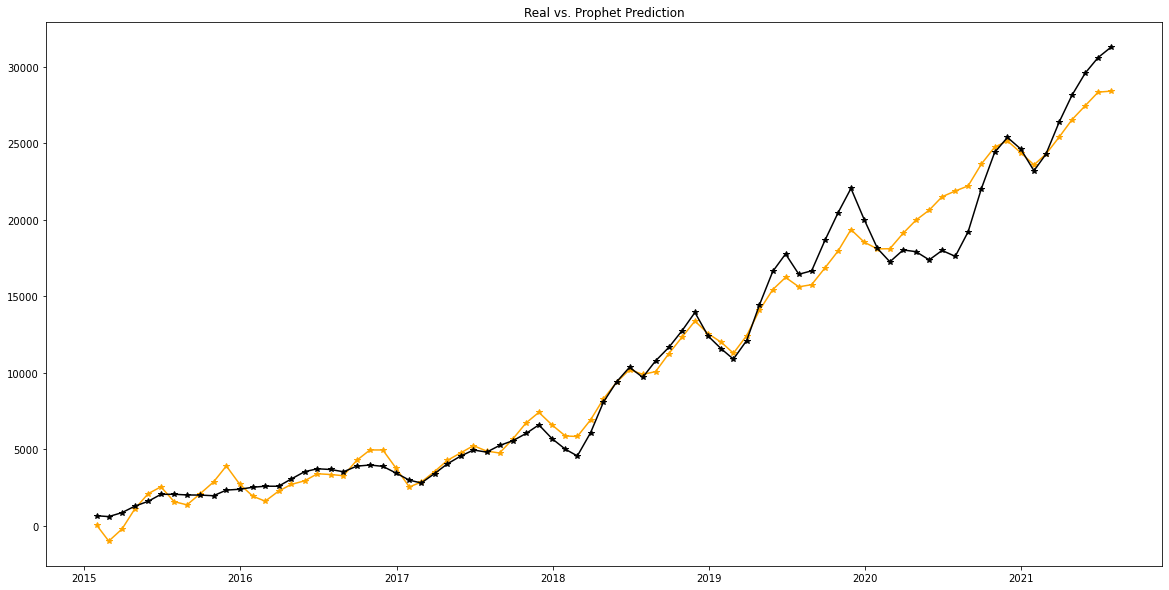

In [53]:
plt.figure(figsize=(20,10))
plt.title('Real vs. Prophet Prediction')

fig1 = plt.plot(prediction['ds'], prediction['yhat'], '*-', color='orange')
fig2 = plt.plot(df['ds'], df['y'], '*-', color='black')

plt.show()

In [57]:
mse = metrics.mean_squared_error(df['y'], prediction['yhat'])
rmse = metrics.mean_squared_error(df['y'], prediction['yhat'], squared=False)
mad = metrics.mean_absolute_error(df['y'], prediction['yhat'])
mape = metrics.mean_absolute_percentage_error(df['y'], prediction['yhat'])

print(f'''
      EQM: {round(mse,2)}
      REQM: {round(rmse,2)}
      MAD: {round(mad,2)}
      MAPE: {round(mape*100,2)}%
      ''')


      EQM: 1591094.83
      REQM: 1261.39
      MAD: 891.15
      MAPE: 17.12%
      


# Prophet Tunning

### Tunning

In [70]:
params_grid = {
    'seasonality_mode': ('multiplicative', 'additive'),
    'change_prior_scale': [0.1, 0.2, 0.3, 0.4,0.5],
    'n_changepoints': [100, 150, 200],
    'year_sazonality': (True, False)
}

grid = ParameterGrid(params_grid)

In [77]:
params = []

for param in grid:
    model = Prophet(
        seasonality_mode=param['seasonality_mode'],
        changepoint_prior_scale=param['change_prior_scale'],
        n_changepoints=param['n_changepoints'],
        yearly_seasonality=param['year_sazonality'],
        daily_seasonality=False,
        weekly_seasonality=False)
    model.fit(df)
    forecast = model.predict(df)
    prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    mape = metrics.mean_absolute_percentage_error(df['y'], prediction['yhat'])

    print(f'''
          MAPE: {round(mape*100,2)}%
          ''')
    
    params.append({
        'MAPE': round(mape*100,2),
        'params': param
    })

15:21:08 - cmdstanpy - INFO - Chain [1] start processing
15:21:10 - cmdstanpy - INFO - Chain [1] done processing
15:21:10 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:21:11 - cmdstanpy - INFO - Chain [1] done processing
15:21:12 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.98%
          


15:21:14 - cmdstanpy - INFO - Chain [1] done processing
15:21:15 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 16.4%
          


15:21:16 - cmdstanpy - INFO - Chain [1] done processing
15:21:17 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.98%
          


15:21:18 - cmdstanpy - INFO - Chain [1] done processing
15:21:19 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:21:20 - cmdstanpy - INFO - Chain [1] done processing
15:21:21 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.98%
          


15:21:23 - cmdstanpy - INFO - Chain [1] done processing
15:21:24 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 16.4%
          


15:21:25 - cmdstanpy - INFO - Chain [1] done processing
15:21:25 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.98%
          


15:21:27 - cmdstanpy - INFO - Chain [1] done processing
15:21:28 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:21:29 - cmdstanpy - INFO - Chain [1] done processing
15:21:30 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.98%
          


15:21:31 - cmdstanpy - INFO - Chain [1] done processing
15:21:32 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 16.4%
          


15:21:33 - cmdstanpy - INFO - Chain [1] done processing
15:21:34 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.98%
          


15:21:37 - cmdstanpy - INFO - Chain [1] done processing
15:21:38 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 7.67%
          


15:21:39 - cmdstanpy - INFO - Chain [1] done processing
15:21:40 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.63%
          


15:21:41 - cmdstanpy - INFO - Chain [1] done processing
15:21:42 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 12.97%
          


15:21:43 - cmdstanpy - INFO - Chain [1] done processing
15:21:44 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.63%
          


15:21:46 - cmdstanpy - INFO - Chain [1] done processing
15:21:47 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 7.67%
          


15:21:48 - cmdstanpy - INFO - Chain [1] done processing
15:21:49 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.63%
          


15:21:51 - cmdstanpy - INFO - Chain [1] done processing
15:21:51 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 12.97%
          


15:21:52 - cmdstanpy - INFO - Chain [1] done processing
15:21:53 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.63%
          


15:21:56 - cmdstanpy - INFO - Chain [1] done processing
15:21:57 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 7.67%
          


15:21:58 - cmdstanpy - INFO - Chain [1] done processing
15:21:59 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.63%
          


15:22:00 - cmdstanpy - INFO - Chain [1] done processing
15:22:01 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 12.97%
          


15:22:02 - cmdstanpy - INFO - Chain [1] done processing
15:22:03 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.63%
          


15:22:05 - cmdstanpy - INFO - Chain [1] done processing
15:22:06 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 6.31%
          


15:22:08 - cmdstanpy - INFO - Chain [1] done processing
15:22:09 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.36%
          


15:22:11 - cmdstanpy - INFO - Chain [1] done processing
15:22:12 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 12.24%
          


15:22:13 - cmdstanpy - INFO - Chain [1] done processing
15:22:14 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.36%
          


15:22:17 - cmdstanpy - INFO - Chain [1] done processing
15:22:18 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 6.31%
          


15:22:19 - cmdstanpy - INFO - Chain [1] done processing
15:22:20 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.36%
          


15:22:23 - cmdstanpy - INFO - Chain [1] done processing
15:22:24 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 12.24%
          


15:22:25 - cmdstanpy - INFO - Chain [1] done processing
15:22:26 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.36%
          


15:22:29 - cmdstanpy - INFO - Chain [1] done processing
15:22:29 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 6.31%
          


15:22:31 - cmdstanpy - INFO - Chain [1] done processing
15:22:32 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.36%
          


15:22:34 - cmdstanpy - INFO - Chain [1] done processing
15:22:35 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 12.24%
          


15:22:37 - cmdstanpy - INFO - Chain [1] done processing
15:22:37 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.36%
          


15:22:41 - cmdstanpy - INFO - Chain [1] done processing
15:22:42 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 4.61%
          


15:22:43 - cmdstanpy - INFO - Chain [1] done processing
15:22:44 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.46%
          


15:22:47 - cmdstanpy - INFO - Chain [1] done processing
15:22:48 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.32%
          


15:22:49 - cmdstanpy - INFO - Chain [1] done processing
15:22:50 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.46%
          


15:22:53 - cmdstanpy - INFO - Chain [1] done processing
15:22:54 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 4.61%
          


15:22:56 - cmdstanpy - INFO - Chain [1] done processing
15:22:57 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.46%
          


15:22:59 - cmdstanpy - INFO - Chain [1] done processing
15:23:00 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.32%
          


15:23:02 - cmdstanpy - INFO - Chain [1] done processing
15:23:03 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.46%
          


15:23:06 - cmdstanpy - INFO - Chain [1] done processing
15:23:07 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 4.61%
          


15:23:08 - cmdstanpy - INFO - Chain [1] done processing
15:23:09 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.46%
          


15:23:12 - cmdstanpy - INFO - Chain [1] done processing
15:23:12 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 11.32%
          


15:23:14 - cmdstanpy - INFO - Chain [1] done processing
15:23:15 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.46%
          


15:23:18 - cmdstanpy - INFO - Chain [1] done processing
15:23:19 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 3.83%
          


15:23:20 - cmdstanpy - INFO - Chain [1] done processing
15:23:21 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:23:24 - cmdstanpy - INFO - Chain [1] done processing
15:23:25 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.78%
          


15:23:26 - cmdstanpy - INFO - Chain [1] done processing
15:23:27 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:23:30 - cmdstanpy - INFO - Chain [1] done processing
15:23:31 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 3.83%
          


15:23:32 - cmdstanpy - INFO - Chain [1] done processing
15:23:33 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:23:36 - cmdstanpy - INFO - Chain [1] done processing
15:23:37 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.78%
          


15:23:38 - cmdstanpy - INFO - Chain [1] done processing
15:23:39 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:23:42 - cmdstanpy - INFO - Chain [1] done processing
15:23:43 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 3.83%
          


15:23:44 - cmdstanpy - INFO - Chain [1] done processing
15:23:45 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 9.55%
          


15:23:48 - cmdstanpy - INFO - Chain [1] done processing
15:23:49 - cmdstanpy - INFO - Chain [1] start processing



          MAPE: 10.78%
          


15:23:50 - cmdstanpy - INFO - Chain [1] done processing



          MAPE: 9.55%
          


In [78]:
params_df = pd.DataFrame(params)
params_df.sort_values(by='MAPE', inplace=True)
params_df

,MAPE,params
48,3.83,"{'change_prior_scale': 0.5, 'n_changepoints': ..."
56,3.83,"{'change_prior_scale': 0.5, 'n_changepoints': ..."
52,3.83,"{'change_prior_scale': 0.5, 'n_changepoints': ..."
36,4.61,"{'change_prior_scale': 0.4, 'n_changepoints': ..."
40,4.61,"{'change_prior_scale': 0.4, 'n_changepoints': ..."
44,4.61,"{'change_prior_scale': 0.4, 'n_changepoints': ..."
24,6.31,"{'change_prior_scale': 0.3, 'n_changepoints': ..."
28,6.31,"{'change_prior_scale': 0.3, 'n_changepoints': ..."
32,6.31,"{'change_prior_scale': 0.3, 'n_changepoints': ..."
12,7.67,"{'change_prior_scale': 0.2, 'n_changepoints': ..."


In [89]:
best_params = params_df.iloc[0]['params']
best_params

{'change_prior_scale': 0.5,
 'n_changepoints': 100,
 'seasonality_mode': 'multiplicative',
 'year_sazonality': True}

### Best Model

In [90]:
model = Prophet(
    seasonality_mode=best_params['seasonality_mode'],
    changepoint_prior_scale=best_params['change_prior_scale'],
    n_changepoints=best_params['n_changepoints'],
    yearly_seasonality=best_params['year_sazonality'],
    daily_seasonality=False,
    weekly_seasonality=False)

In [91]:
model.fit(df)
forecast = model.predict(df)
prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

15:34:33 - cmdstanpy - INFO - Chain [1] start processing
15:34:36 - cmdstanpy - INFO - Chain [1] done processing


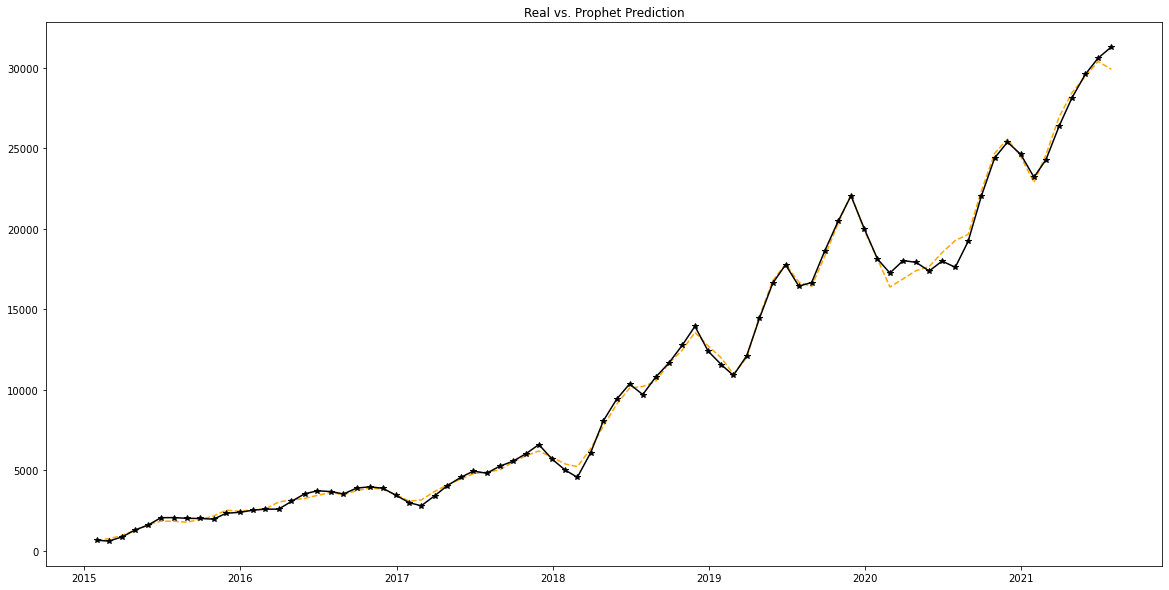

In [97]:
plt.figure(figsize=(20,10))
plt.title('Real vs. Prophet Prediction')

fig1 = plt.plot(prediction['ds'], prediction['yhat'], '--', color='orange')
fig2 = plt.plot(df['ds'], df['y'], '*-', color='black')

plt.show()

In [93]:
mse = metrics.mean_squared_error(df['y'], prediction['yhat'])
rmse = metrics.mean_squared_error(df['y'], prediction['yhat'], squared=False)
mad = metrics.mean_absolute_error(df['y'], prediction['yhat'])
mape = metrics.mean_absolute_percentage_error(df['y'], prediction['yhat'])

print(f'''
      EQM: {round(mse,2)}
      REQM: {round(rmse,2)}
      MAD: {round(mad,2)}
      MAPE: {round(mape*100,2)}%
      ''')


      EQM: 148554.47
      REQM: 385.43
      MAD: 262.17
      MAPE: 3.83%
      
